# Visualisation de données

In [1]:
import pandas as pd
# import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

## Données TSG3 train

In [2]:
data_dir = 'data/'

In [3]:
data = pd.read_csv(data_dir + 'TSG3_train_2386_samples_1685_genes.csv', sep=';', index_col=0)
print('data', data.shape)
data.head()

data (2386, 1686)


,target,NAT2@10,AANAT@15,ABCA4@24,ACRV1@56,ADH1A@124,ADH4@127,ACAN@176,AHSG@197,ALPG@251,...,LOC102724804@102724804,RGS2-AS1@102724954,CASC23@103581031,LINC01337@103689917,LINC01269@103695436,SMAD1-AS1@104326058,LINC01320@104355288,LINC01525@104355292,FOXP1-AS1@104502416,LOC104613533@104613533
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-85-7710-11A,bronchus_lung,0.163748,0.766694,0.767072,0.022848,0.139660,0.040948,0.107942,0.000000,1.406033,...,0.161115,0.000000,0.0,0.214748,0.864863,0.0,0.012611,0.0,0.070998,0.0
TCGA-DD-A3A8-11A,liver,4.003451,0.000000,0.110885,0.026463,8.568801,9.615037,0.000000,10.921722,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.401312,0.0,0.000000,0.0
GTEX-PX3G-0326-SM-2I3EO,heart,0.052237,0.045330,0.061543,0.015814,0.023372,0.016306,0.149207,0.040630,0.007055,...,0.000000,0.000000,0.0,0.187641,0.000000,0.0,0.000000,0.0,0.000000,0.0
GTEX-XLM4-0011-R3B-SM-4AT6E,brain,0.108329,0.350975,0.085389,0.486369,0.029594,0.041027,0.150139,0.117122,0.011917,...,0.000000,0.000000,0.0,0.066263,0.000000,0.0,0.036595,0.0,0.062718,0.0
GTEX-RM2N-0726-SM-48FD5,esophagus,0.047108,0.176655,0.084551,0.074389,0.234415,0.756130,0.049303,0.280086,0.000000,...,0.000000,0.074918,0.0,0.180624,2.556904,0.0,0.000000,0.0,0.000000,0.0


## Cibles

In [4]:
data_targets = data['target']
targets = list(data_targets.unique())
print(len(targets), targets)

20 ['bronchus_lung', 'liver', 'heart', 'brain', 'esophagus', 'connective_tissues', 'thyroid_gland', 'prostate', 'stomach', 'kidney', 'artery', 'muscles', 'blood', 'fibroblast', 'skin', 'breast', 'central_nervous_system', 'uterus', 'colon', 'testis']


## Sélection des tissus à visualiser

In [16]:
selected_targets = ['breast', 'bronchus_lung', 'brain', 'colon', 'skin', 'blood']
selected_targets = sorted(selected_targets)
is_selected = data['target'].isin(selected_targets)
y = data.loc[is_selected, 'target']
print('y', len(y))
y.head()

y 905


id_sample
TCGA-85-7710-11A               bronchus_lung
GTEX-XLM4-0011-R3B-SM-4AT6E            brain
TCGA-44-6146-11A               bronchus_lung
TCGA-49-6744-11A               bronchus_lung
GTEX-WXYG-0005-SM-3NB3M                blood
Name: target, dtype: object

## Préparation des données X (sélection, nettoyage NA, variance)

### Réduction à des tissus sélectionnés 

In [17]:
X = data.loc[y.index]
X.index.name = 'id_sample'
X = X.dropna(axis=1)
X = X.drop(columns=['target'])
print('X', X.shape)
X.head()

X (905, 1685)


,NAT2@10,AANAT@15,ABCA4@24,ACRV1@56,ADH1A@124,ADH4@127,ACAN@176,AHSG@197,ALPG@251,AMY2A@279,...,LOC102724804@102724804,RGS2-AS1@102724954,CASC23@103581031,LINC01337@103689917,LINC01269@103695436,SMAD1-AS1@104326058,LINC01320@104355288,LINC01525@104355292,FOXP1-AS1@104502416,LOC104613533@104613533
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-85-7710-11A,0.163748,0.766694,0.767072,0.022848,0.139660,0.040948,0.107942,0.000000,1.406033,0.013358,...,0.161115,0.000000,0.0,0.214748,0.864863,0.000000,0.012611,0.0,0.070998,0.0
GTEX-XLM4-0011-R3B-SM-4AT6E,0.108329,0.350975,0.085389,0.486369,0.029594,0.041027,0.150139,0.117122,0.011917,1.130954,...,0.000000,0.000000,0.0,0.066263,0.000000,0.000000,0.036595,0.0,0.062718,0.0
TCGA-44-6146-11A,0.262245,0.163930,0.169309,0.042342,0.608996,0.019245,0.021621,0.000000,0.673206,0.000000,...,0.044734,0.162666,0.0,0.104158,0.076860,0.185196,0.011768,0.0,0.129769,0.0
TCGA-49-6744-11A,0.205480,0.037593,0.382000,0.037224,0.571918,0.129981,0.096134,0.000000,0.327811,0.021808,...,0.186735,0.274387,0.0,0.000000,0.132301,0.000000,0.000000,0.0,0.114494,0.0
GTEX-WXYG-0005-SM-3NB3M,0.020440,0.346817,0.011187,0.018343,0.018123,0.049894,0.012268,0.054760,0.000000,0.622276,...,0.000000,0.095911,0.0,0.331146,0.429172,0.000000,0.000000,0.0,0.038577,0.0


### Sélection des gènes par variance

In [18]:
n_genes = 500
variance = X.var().sort_values(ascending=False)
selected_genes = list(variance.head(n_genes).index)
X = X[selected_genes]
print('X', X.shape)
X.head()

X (905, 500)


,SFTPC@6440,SFTPA1@653509,SFTPB@6439,GFAP@2670,SFTPA2@729238,MT3@4504,SNAP25@6616,KRT2@3849,SCGB2A2@4250,LORICRIN@4014,...,IGFALS@3483,CYP2C9@1559,IRAG1-AS1@100129827,CCDC157@550631,PPP1R42@286187,C1orf158@93190,CREB3L3@84699,CYP17A1@1586,C5orf52@100190949,FGF5@2250
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-85-7710-11A,12.099865,12.589748,11.476948,0.012501,12.669339,0.067713,0.826274,0.491622,0.000000,0.175280,...,0.871318,0.073597,0.366731,0.554955,0.688890,0.800498,0.101003,0.409789,0.000000,0.000000
GTEX-XLM4-0011-R3B-SM-4AT6E,1.715928,0.147197,0.371941,10.029099,0.602809,9.799491,9.953025,0.012353,0.029283,0.619606,...,0.248674,0.016069,0.775710,1.544208,0.572377,0.016659,0.360835,0.511630,0.084449,0.106861
TCGA-44-6146-11A,12.875473,12.748155,11.802899,0.030902,13.260127,0.075597,1.576370,0.037204,0.000000,0.000000,...,1.554706,0.090991,0.066205,0.406117,0.000000,0.067634,0.069294,0.391020,0.000000,0.000000
TCGA-49-6744-11A,12.710592,12.439626,11.777666,0.027154,12.532589,0.066551,0.649246,0.032700,0.000000,0.000000,...,0.957541,0.093091,0.194380,0.342271,0.238632,0.380573,0.000000,0.794298,0.000000,0.000000
GTEX-WXYG-0005-SM-3NB3M,1.278249,0.691798,1.146232,1.535900,0.789991,0.467475,0.621803,0.926631,0.292921,0.499906,...,0.250672,0.043684,1.273329,0.547527,0.000000,0.003827,0.000000,1.085974,0.000000,0.014847


## Normalisation de données

In [19]:
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
print('X_scaled', X_scaled.shape)
X_scaled.head()

X_scaled (905, 500)


,SFTPC@6440,SFTPA1@653509,SFTPB@6439,GFAP@2670,SFTPA2@729238,MT3@4504,SNAP25@6616,KRT2@3849,SCGB2A2@4250,LORICRIN@4014,...,IGFALS@3483,CYP2C9@1559,IRAG1-AS1@100129827,CCDC157@550631,PPP1R42@286187,C1orf158@93190,CREB3L3@84699,CYP17A1@1586,C5orf52@100190949,FGF5@2250
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-85-7710-11A,2.011333,2.331554,1.998578,-0.811383,2.306132,-0.769984,-0.589613,-0.356278,-0.586168,-0.402752,...,0.884133,-0.346916,-0.143541,-0.473522,0.993837,1.488192,-0.200582,-0.149845,-0.328652,-0.324479
GTEX-XLM4-0011-R3B-SM-4AT6E,-0.362402,-0.525195,-0.560832,1.497502,-0.486241,1.833004,1.945155,-0.495108,-0.577162,-0.259417,...,-0.563950,-0.480961,0.810414,1.841321,0.720864,-0.352282,0.411082,0.090458,-0.128740,-0.070566
TCGA-44-6146-11A,2.188634,2.367924,2.073701,-0.807141,2.442849,-0.767875,-0.381289,-0.487909,-0.586168,-0.459296,...,2.473489,-0.306387,-0.844526,-0.821801,-0.620131,-0.232591,-0.275227,-0.194132,-0.328652,-0.324479
TCGA-49-6744-11A,2.150943,2.297087,2.067885,-0.808005,2.274486,-0.770295,-0.638779,-0.489214,-0.586168,-0.459296,...,1.084662,-0.301493,-0.545555,-0.971200,-0.061051,0.502198,-0.438350,0.757437,-0.328652,-0.324479
GTEX-WXYG-0005-SM-3NB3M,-0.462454,-0.400157,-0.382379,-0.460230,-0.442924,-0.663058,-0.646401,-0.230268,-0.496082,-0.298031,...,-0.559304,-0.416616,1.971124,-0.490903,-0.620131,-0.382412,-0.438350,1.445671,-0.328652,-0.289201


## Embedding

In [20]:
random_state = 0
# umap_options = {'n_neighbors': 100, 'metric': 'chebyshev', 'init': 'spectral'}
# method = umap.UMAP(n_components=2, random_state=random_state, **umap_options)
method = PCA(n_components=2, random_state=random_state)

In [21]:
X_emb = method.fit_transform(X_scaled)
columns = ['DIM' + str(c) for c in range(1, X_emb.shape[1]+1, 1)]
X_emb = pd.DataFrame(X_emb, index=X_scaled.index, columns=columns)

In [22]:
X_emb['target'] = y
print('X_emb', X_emb.shape)
X_emb.head()

X_emb (905, 3)


,DIM1,DIM2,target
id_sample,,,
TCGA-85-7710-11A,-6.861605,15.536616,bronchus_lung
GTEX-XLM4-0011-R3B-SM-4AT6E,24.419785,-2.431480,brain
TCGA-44-6146-11A,-7.643688,7.887472,bronchus_lung
TCGA-49-6744-11A,-6.937755,11.471824,bronchus_lung
GTEX-WXYG-0005-SM-3NB3M,-8.173493,-0.856974,blood


## Visualisation

In [23]:
def extract_colors_from_colormap(n=10, colormap='jet'):
    cmap = cm.get_cmap(colormap)
    norm = mpl.colors.Normalize(vmin=0, vmax=n-1) 
    return [cmap(norm(ind)) for ind in range(n)]

In [24]:
class_colors = extract_colors_from_colormap(n=len(selected_targets), colormap='gist_rainbow')
dict_colors = dict(zip(selected_targets, class_colors))
print(dict_colors)

{'blood': (1.0, 0.0, 0.16, 1.0), 'brain': (1.0, 0.918918918918919, 0.0, 1.0), 'breast': (0.0, 1.0, 0.0, 1.0), 'bronchus_lung': (0.0, 0.9239130434782604, 1.0, 1.0), 'colon': (0.16304347826086973, 0.0, 1.0, 1.0), 'skin': (1.0, 0.0, 0.75, 1.0)}


In [25]:
X_emb['color'] = X_emb['target'].map(dict_colors)
print('X_emb', X_emb.shape)
X_emb.head()

X_emb (905, 4)


,DIM1,DIM2,target,color
id_sample,,,,
TCGA-85-7710-11A,-6.861605,15.536616,bronchus_lung,"(0.0, 0.9239130434782604, 1.0, 1.0)"
GTEX-XLM4-0011-R3B-SM-4AT6E,24.419785,-2.431480,brain,"(1.0, 0.918918918918919, 0.0, 1.0)"
TCGA-44-6146-11A,-7.643688,7.887472,bronchus_lung,"(0.0, 0.9239130434782604, 1.0, 1.0)"
TCGA-49-6744-11A,-6.937755,11.471824,bronchus_lung,"(0.0, 0.9239130434782604, 1.0, 1.0)"
GTEX-WXYG-0005-SM-3NB3M,-8.173493,-0.856974,blood,"(1.0, 0.0, 0.16, 1.0)"


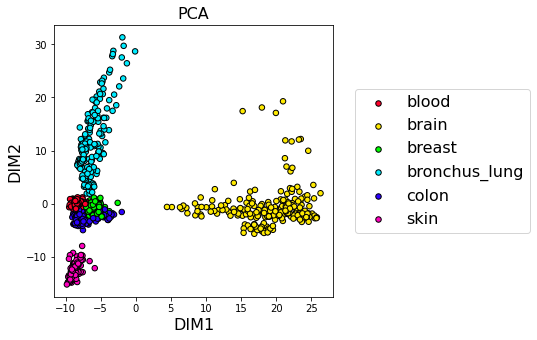

In [26]:
text_options = {'fontsize': 18}
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(X_emb['DIM1'], X_emb['DIM2'], marker='o', s=30, edgecolor='k', color=X_emb['color'])
ax.set_xlabel('DIM1', **text_options)
ax.set_ylabel('DIM2', **text_options)
ax.set_title(method.__class__.__name__, **text_options)
for k, v in dict_colors.items():
    ax.scatter([], [], marker='o', s=30, edgecolor='k', color=v, label=k)
L = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), **text_options)